## Rentals data analysis ( Exploratory Notes )

In [3]:
import pandas as pd
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt


- #### Number of records: 46,722
- #### Data integrity:
     1. ##### Missing value:
        - Several columns have missing values, with 'gender', 'roommates', and several cost-related columns like 'additionalCostsRaw' and 'deposit' being the most affected.
        - These missing values need further investigation to determine whether they are due to data collection issues or actual absence of information.
    2. ##### Data types:
        - Most of the columns are of object type, suggesting they might contain textual or mixed data. Numeric columns like 'areaSqm', 'rent', and 'rent_per_area' are appropriately identified as float64.
    3. ##### Rent and Area Insights:
        - The average rent is approximately €668, with a wide range from €1 to €5999.
        - The distribution shows a median rent of €550 and the majority of rents (75%) fall below €800.
    4. ##### Area size:
        - The average area size of properties is around 31 square meters, with a considerable range from 6 to 675 square meters.
    5. ##### City Distribution:
       - Unique Cities
         - The dataset covers 739 unique cities, indicating a diverse geographical representation.
    6. ##### Property Types:
           Distribution:
        - The dataset predominantly consists of Rooms (30,494) followed by Apartments (11,794), Studios (4,093), Anti-squats (336), and Student residences (5).
        - This suggests a higher prevalence of shared or smaller living spaces compared to larger residential units.
### Overall:
- The dataset contains rental property listings with various attributes like area, city, rent, and property type.
- There are missing values in some columns like 'energyLabel', 'gender', and 'pets'.
- The 'rent' and 'areaSqm' columns need to be cleaned and converted to numeric types for analysis.
- There are duplicate columns such as 'postedAgo' and 'crawledAt', which might not provide additional value.

        
        
### Suggestions for Improvement:
- Data Cleaning: Clean and preprocess columns with monetary values and text descriptions.
- Feature Engineering: Create new features like rent per area to better understand pricing patterns.
- Data Enrichment: Enhance the dataset with additional external data like neighborhood demographics or property amenities.
- Data Visualization: Use visualizations to explore relationships between variables and identify patterns or trends.

In [7]:

def explore_rentals_data() -> None:
    print("Analysing...")
    
    # Get current working directory
    cwd = os.getcwd()
    
    # Navigate up to the root directory
    root_path = Path(cwd).parent
    
    # Find and load JSON file using Path
    file_path = root_path / 'data' / 'rentals.json'
    
    if not file_path.exists():
        print(f"Error: File '{file_path}' does not exist.")
        return

    # Load JSON data into a DataFrame
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
        
        df = pd.json_normalize(data)
                
        # Data cleaning
        df['rent'] = df['rent'].str.extract(r'(\d+)').astype(float)
        df['areaSqm'] = df['areaSqm'].str.extract(r'(\d+)').astype(float)
        
        # Calculating average rent per area
        df['rent_per_area'] = df['rent'] / df['areaSqm']
        
        # Displaying insights
        print("Showing first 3 rows:")
        display(df.head(5))
        print("\n")
        
        print(f"Missing values per column:\n{df.isnull().sum()}\n")
        
        print(f"Data types:\n{df.dtypes}\n")
        
        print(f"Summary statistics for 'rent':\n{df['rent'].describe()}\n")
        
        print(f"Summary statistics for 'areaSqm':\n{df['areaSqm'].describe()}\n")
        
        print(f"Number of unique cities: {df['city'].nunique()}\n")
        
        print(f"Number of properties by property type:\n{df['propertyType'].value_counts()}\n")
        
        print(f"Average rent per area: {df['rent_per_area'].mean():.2f}")
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Call the function
explore_rentals_data()


Analysing...
Showing first 3 rows:


,_id,additionalCostsRaw,areaSqm,city,crawlStatus,crawledAt,deposit,descriptionTranslated,detailsCrawledAt,energyLabel,...,availability,registrationCost,rent,roommates,shower,smokingInside,source,title,toilet,rent_per_area
0,[5d2b113a43cbfd7c77a998f4],\n € 50\n ...,14.0,Rotterdam,done,[2019-07-26T22:18:23.018+0000],\n € 500\n ...,"Nice room for rent, accros the Feyenoord stadi...",[2019-07-22T07:10:41.849+0000],Unknown,...,26-06-'19 - Indefinite period,\n € 0\n ...,500.0,5,Shared,No,kamernet,West-Varkenoordseweg,Shared,35.714286
1,[5d2b113a43cbfd7c77a9991a],\n € 0\n ...,30.0,Amsterdam,done,[2019-08-10T22:28:46.099+0000],\n € 895\n ...,"Efficiently furnished, with a large balcony, a...",[2019-07-22T06:29:33.112+0000],Unknown,...,15-08-'19 - Indefinite period,\n € 0\n ...,950.0,None,Own,No,kamernet,Parelstraat,Own,31.666667
2,[5d2b113a43cbfd7c77a99931],\n -\n ...,11.0,Amsterdam,done,[2019-10-02T22:00:33.141+0000],\n € 1000\n ...,Kamer van 11m2 vlakbij het Vondelpark. Met een...,[2019-07-21T08:44:32.816+0000],Unknown,...,01-08-'19 - Indefinite period,\n -\n ...,1000.0,1,Shared,Yes,kamernet,Zeilstraat,Shared,90.909091
3,[5d2b113a43cbfd7c77a9994a],-,16.0,Assen,done,[2019-07-18T22:00:31.018+0000],€ 290,De kamer is 16m2De kamer is voorzien van een z...,[2019-07-27T19:03:44.443+0000],Unknown,...,16-06-'19 - Indefinite period,-,290.0,4,Shared,Yes,kamernet,Ruiterakker,Shared,18.125000
4,[5d2b113b43cbfd7c77a9997c],\n -\n ...,22.0,Rotterdam,done,[2019-08-12T02:06:14.635+0000],\n € 500\n ...,,[2019-07-21T08:13:53.217+0000],Unknown,...,01-08-'19 - Indefinite period,\n -\n ...,475.0,1,Shared,No,kamernet,Zwart Janstraat,Shared,21.590909




Missing values per column:
_id                        0
additionalCostsRaw       100
areaSqm                    0
city                       0
crawlStatus                0
crawledAt                  0
deposit                  100
descriptionTranslated    100
detailsCrawledAt           0
energyLabel              100
firstSeenAt                0
furnish                    0
gender                   912
internet                 100
isRoomActive             100
kitchen                  100
lastSeenAt                 0
latitude                   0
living                   100
longitude                  0
matchCapacity            100
pageDescription          100
pageTitle                100
pets                     100
postalCode                 0
postedAgo                  0
propertyType               0
availability               0
registrationCost         100
rent                       0
roommates                912
shower                   100
smokingInside            100
source        

Visualizing...
Plot saved in /Users/raybags/Desktop/personal/projects-rep/assesment1/scratch/v_images


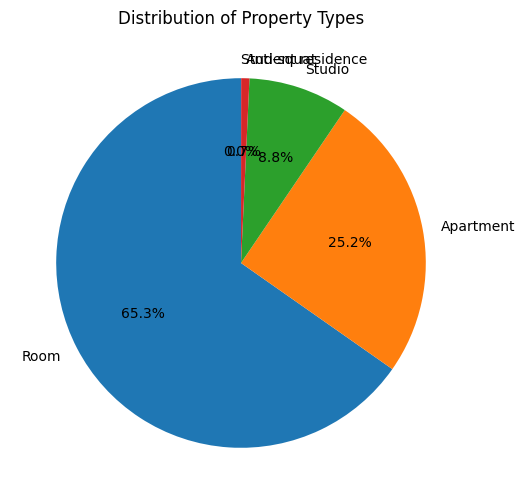

Plot saved in /Users/raybags/Desktop/personal/projects-rep/assesment1/scratch/v_images


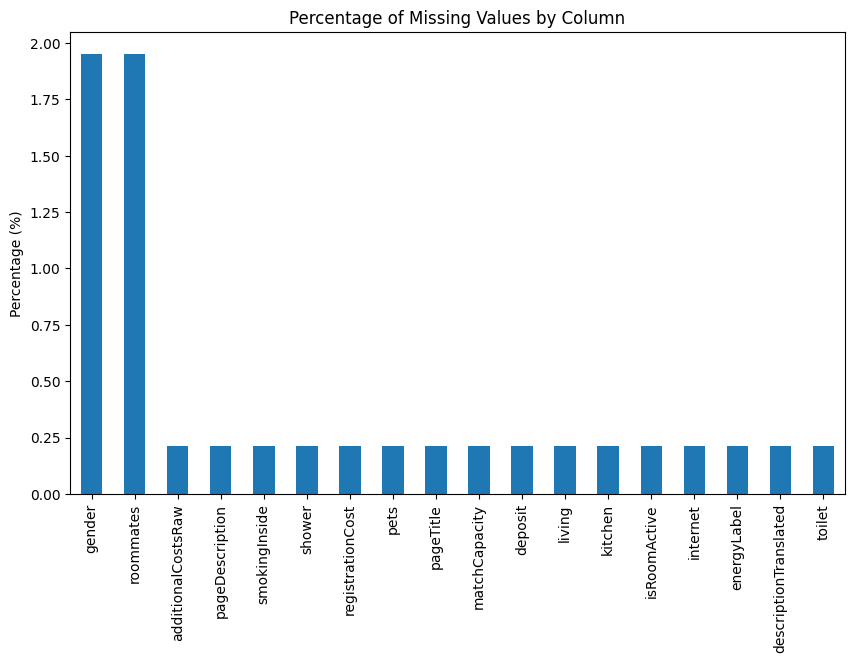

Plot saved in /Users/raybags/Desktop/personal/projects-rep/assesment1/scratch/v_images


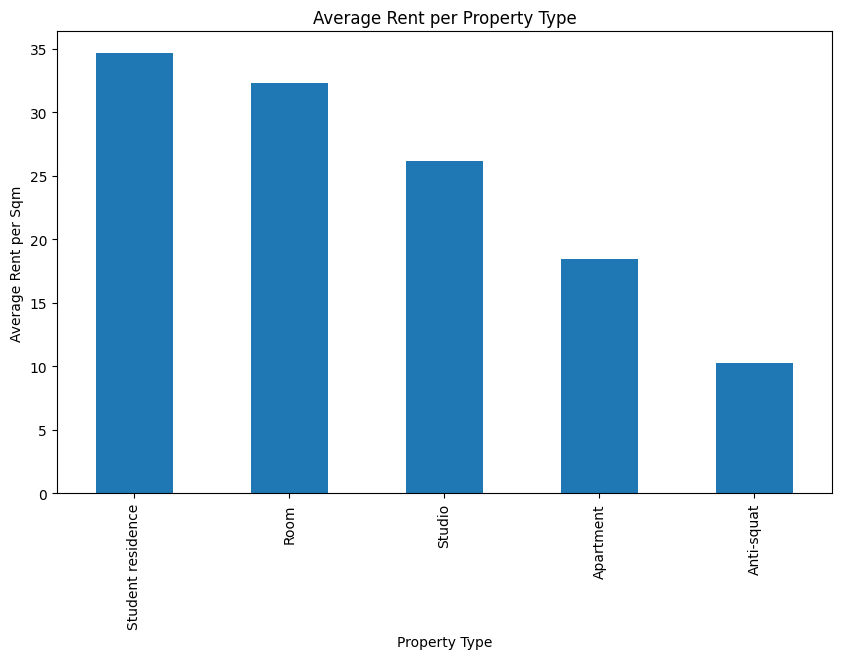

In [13]:
def visualize_rentals_data(showVisuals: bool = False) -> None:


    print("Visualizing...")

    cwd = os.getcwd()

    # Navigate up to the root directory
    root_path = Path(cwd).parent

    # Create v_images directory inside the scratch folder if it doesn't exist
    images_dir = root_path / 'scratch' / 'v_images'
    if not images_dir.exists():
        print(f"Creating directory: {images_dir}")
        images_dir.mkdir(parents=True, exist_ok=True)

    # Find and load JSON file using Path
    file_path = root_path / 'data' / 'rentals.json'

    if not file_path.exists():
        print(f"Error: File '{file_path}' does not exist.")
        return

    # Load JSON data into a DataFrame
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)

        df = pd.json_normalize(data)

        # Data cleaning
        df['rent'] = df['rent'].str.extract(r'(\d+)').astype(float)
        df['areaSqm'] = df['areaSqm'].str.extract(r'(\d+)').astype(float)

        # Calculating average rent per area
        df['rent_per_area'] = df['rent'] / df['areaSqm']

        # Pie chart for distribution of property types
        plt.figure(figsize=(8, 6))
        df['propertyType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.title('Distribution of Property Types')
        plt.ylabel('')
        plt.savefig(images_dir / 'property_type_distribution.png')
        print(f"Plot saved in {images_dir}")

        if showVisuals:
            plt.show()
        else:
            plt.close()

        # Missing values percentage for each column
        missing_values = df.isnull().sum() / len(df) * 100
        missing_values = missing_values[missing_values > 0]

        plt.figure(figsize=(10, 6))
        missing_values.sort_values(ascending=False).plot(kind='bar')
        plt.title('Percentage of Missing Values by Column')
        plt.ylabel('Percentage (%)')
        plt.savefig(images_dir / 'missing_values_percentage.png')
        print(f"Plot saved in {images_dir}")

        if showVisuals:
            plt.show()
        else:
            plt.close()

        # Average rent per property type
        avg_rent = df.groupby('propertyType')['rent_per_area'].mean().sort_values(ascending=False)

        plt.figure(figsize=(10, 6))
        avg_rent.plot(kind='bar')
        plt.title('Average Rent per Property Type')
        plt.ylabel('Average Rent per Sqm')
        plt.xlabel('Property Type')
        plt.savefig(images_dir / 'average_rent_per_property_type.png')
        print(f"Plot saved in {images_dir}")

        if showVisuals:
            plt.show()
        else:
            plt.close()

    except Exception as e:
        print(f"An error occurred: {e}")

visualize_rentals_data(showVisuals=False)


## Data visualization - rentals
### Distribution of Property Types (Pie Chart)
![Distribution of Property Types](v_images/property_type_distribution.png)
    
- The pie chart visualizes the distribution of different property types in the dataset. Each slice represents a property type, and the size of the slice corresponds to the percentage of that property type in the dataset. This visualization helps to understand the variety and prevalence of different property types. 

### Percentage of Missing Values by Column (Bar Chart)
![Percentage of Missing Values by Column](v_images/missing_values_percentage.png)

- This bar chart shows the percentage of missing values for each column in the dataset. Columns with a higher percentage of missing values may require attention, either through imputation or further investigation. Understanding missing data is crucial for data quality and subsequent analysis.

### Average Rent per Property Type (Bar Chart)
![Average Rent per Property Type](v_images/average_rent_per_property_type.png)

- The bar chart displays the average rent per square meter (rent_per_area) for each property type. It provides insights into the relative affordability or desirability of different property types based on their average rent. Higher bars indicate higher average rents for those property types.
